# Your name: Karina Ramirez
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [6]:
# import packages 
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 

# Data File Reading Section
## Write code to read in data from external sources here

In [7]:
# read datasets
data = pd.read_csv('data.csv', engine = 'python')

# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [8]:
#1 descriptions
data.describe 

#2 total rows and columns 
data.shape

#3 non-null values in each column 
data.count()

#4 nulls in each row 
data.isnull().sum()

#5 range, column, number of non-null objects of each column, datatype and memory usage 
data.info()

#6 top 10 and bottom 10 records
data.head(10)
data.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [9]:
#1 dropping columns
data.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis = 1, inplace = True)

#2 dropping rows where no date is available 
data.dropna(subset = ['date'], inplace = True)

In [10]:
# displaying final columns (data.columns)
data.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [11]:
# replace types
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }
data.type = data.type.replace(types)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [12]:
# Display top 10 records after codification of 'types'
data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [13]:
# changing type to datetime 
data['date'] = data['date'].astype('datetime64[ns]')

# creating new column 'year'
data['year'] = data['date'].dt.year

# top 5 records
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [14]:
# define columns of importance, which shall be used reguarly (COLS = ....)
COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5','year']

# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data[COLS] = mean_imputer.fit_transform(data[COLS])

# display data.info after the transformation
data.info
data.head()

# change year to integer to get rid of decimal place
data.year = data.year.astype(int)

# display that there are no more missing values in the dataset
data.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

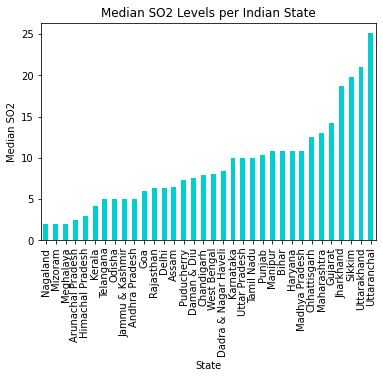

In [84]:
# table 
median_so2 = data.groupby('state').so2.agg('median')

# sorting in ascending order
median_so2 = median_so2.sort_values(ascending = True)

# bar chart 
median_so2.plot(kind = 'bar', color = 'darkturquoise')

# legend
plt.title('Median SO2 Levels per Indian State')
plt.xlabel('State')
plt.ylabel('Median SO2')
plt.show()

# state with highest SO2 content = Uttaranchal

### no2 status

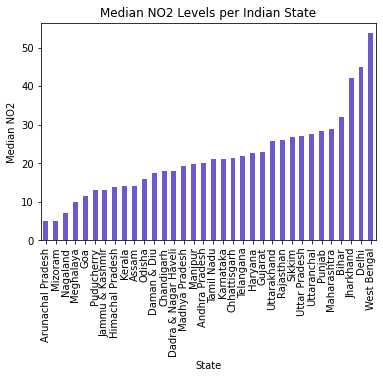

In [85]:
# table 
median_no2 = data.groupby('state').no2.agg('median')

# sorting in ascending order
median_no2 = median_no2.sort_values(ascending = True)

# bar chart 
median_no2.plot(kind = 'bar', color = 'slateblue')

# legend
plt.title('Median NO2 Levels per Indian State')
plt.xlabel('State')
plt.ylabel('Median NO2')
plt.show()

# state with highest NO2 content = West Bengal

### rspm status

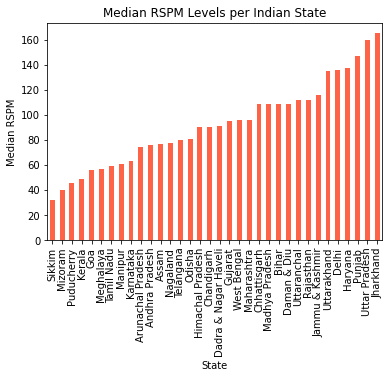

In [86]:
# table 
median_rspm = data.groupby('state').rspm.agg('median')

# sorting in ascending order
median_rspm = median_rspm.sort_values(ascending = True)

# bar chart 
median_rspm.plot(kind = 'bar', color = 'tomato')

# legend
plt.title('Median RSPM Levels per Indian State')
plt.xlabel('State')
plt.ylabel('Median RSPM')
plt.show()

# state with highest RSPM content = Jharkhand

### spm status

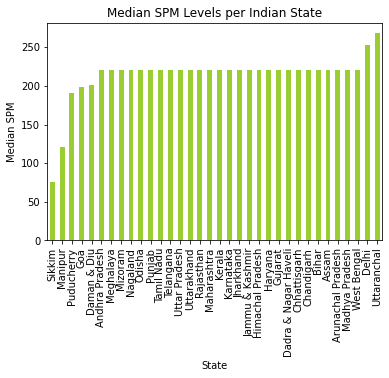

In [87]:
# table 
median_spm = data.groupby('state').spm.agg('median')

# sorting in ascending order
median_spm = median_spm.sort_values(ascending = True)

# bar chart 
median_spm.plot(kind = 'bar', color = 'yellowgreen')

# legend
plt.title('Median SPM Levels per Indian State')
plt.xlabel('State')
plt.ylabel('Median SPM')
plt.show()

# state with highest SPM content = Uttaranchal

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [68]:
newdata = data.loc[data.state == 'Andhra Pradesh', ['no2', 'so2', 'rspm', 'spm','year']]
newdata = newdata.groupby('year')
newdata.head()

,no2,so2,rspm,spm,year
0,17.4,4.8,108.833091,220.78348,1990
1,7.0,3.1,108.833091,220.78348,1990
2,28.5,6.2,108.833091,220.78348,1990
3,14.7,6.3,108.833091,220.78348,1990
4,7.5,4.7,108.833091,220.78348,1990
...,...,...,...,...,...
23753,18.0,9.0,46.000000,220.78348,2015
23754,18.0,8.0,27.000000,220.78348,2015
23755,15.0,9.0,29.000000,220.78348,2015
23756,17.0,7.0,78.000000,220.78348,2015


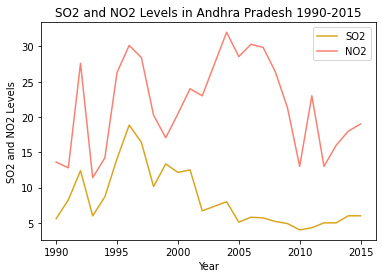

In [97]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 

# part a
so2 = newdata.so2.median()
no2 = newdata.no2.median()

# yearly trend line
plt.plot(so2.index, so2, label = 'SO2', color = 'goldenrod')
plt.plot(no2.index, no2, label = 'NO2', color = 'salmon')

# legend 
plt.title('SO2 and NO2 Levels in Andhra Pradesh 1990-2015')
plt.xlabel('Year')
plt.ylabel('SO2 and NO2 Levels')
plt.legend(loc = 'upper right')

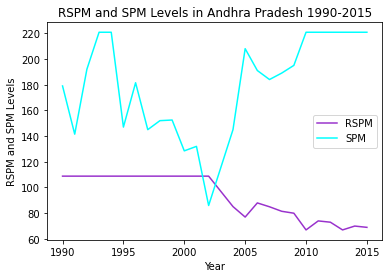

In [96]:
# part b
rspm = newdata.rspm.median()
spm = newdata.spm.median()

# yearly trend line
plt.plot(rspm.index, rspm, label = 'RSPM', color = 'darkorchid')
plt.plot(spm.index, spm, label = 'SPM', color = 'cyan')

# legend 
plt.title('RSPM and SPM Levels in Andhra Pradesh 1990-2015')
plt.xlabel('Year')
plt.ylabel('RSPM and SPM Levels')
plt.legend(loc = 'right')

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. 

Based on this Exploratory Data Analysis for the State of Andhra Pradesh, RSPM, SPM, NO2 and SO2 concentrations (micrograms per cubic metre) are analyzed to see the air quality from 1990-2015. RSPM content plateaued for the first 12 years and then dropped in the last 23 years. This may indicate that Andhra Pradesh may have taken some environmental measures to reduce RSPM. SPM content has spiked up and down throughout the years. The largest spike upwards for SPM occurred between 2000-2005 which may indicate a drastic effect on the environment, such as increased industrialization. This shows deterioritating air quality, which contrasts the RSPM results. Both SO2 and NO2 levels have fluctuated throughout the years. It is interesting that RSPM is the only criteria of air pollution that decreases throughout the years, while the others spiked up and down. Further biological research is needed in order to see the weight of each of these criteria for measuring air quality and what is a desired level. The air pollution in the State of Andhra Pradesh has not improved much since 1990, with the exception of RSPM values.